# UTKFace Data Exploration Assignment

In [25]:
#Necessary libraries
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd

In [26]:
#Path to UTKFace dataset (vul hier je eigen pad in)
DATASET_DIR = "./UTKFace"

In [27]:
#Method for loading the dataset into a pandas dataframe
def parse_filename(fname):
    '''Parses the filename to extract age, gender, and race information. The following encodings are applied
        Gender: 0 = male, 1 = female
        Race: 0 = White, 1 = Black, 2 = Asian, 3 = Indian, 4 = Others'''
    try:
        age, gender, race, _ = fname.split("_")
        return int(age), int(gender), int(race)
    except:
        return None, None, None

In [28]:
#Dataframe creation
records = []
for fname in os.listdir(DATASET_DIR):
    if fname.endswith(".jpg"):
        age, gender, race = parse_filename(fname)
        if age is not None:
            records.append({"filename": fname, "age": age,
                            "gender": gender, "race": race})

df = pd.DataFrame(records)
df.head()

,filename,age,gender,race
0,26_0_1_20170117200132563.jpg,26,0,1
1,27_0_1_20170120133818199.jpg,27,0,1
2,16_1_3_20170104222158160.jpg,16,1,3
3,40_1_0_20170105172927477.jpg,40,1,0
4,40_0_0_20170116232730548.jpg,40,0,0


In [29]:
#Checking how much data we have
print("Number of samples:", len(df))
print("Age range:", df['age'].min(), "-", df['age'].max())

Number of samples: 24102
Age range: 1 - 116


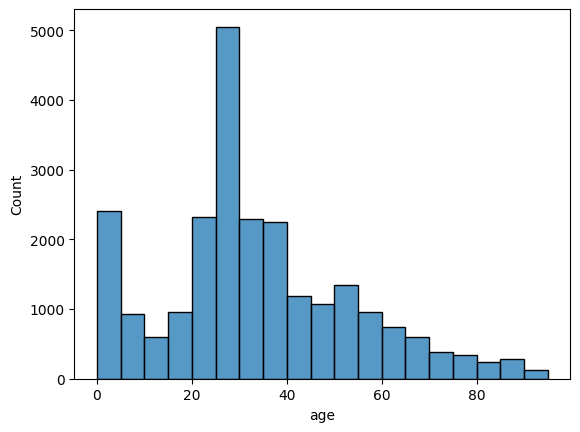

In [30]:
#Example of plotting a distribution with seaborn
sns.histplot(df['age'], bins=range(0, 100, 5))
plt.show()

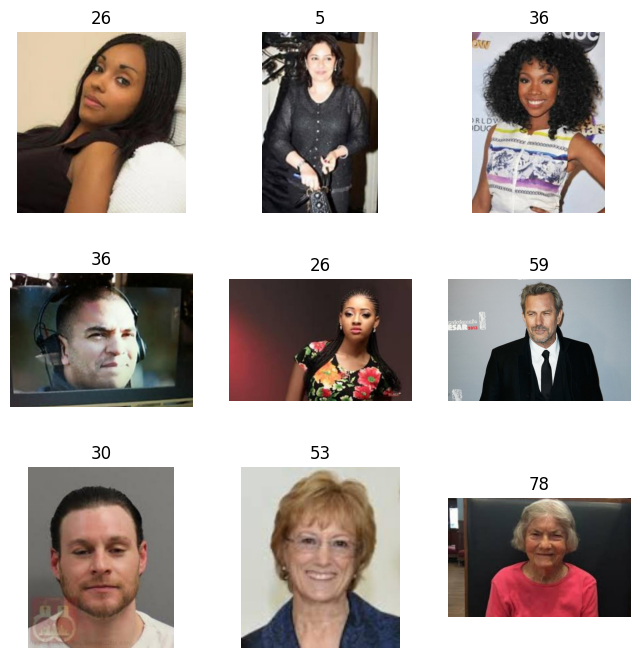

In [31]:
#Example of showing some images (random everytime)
sample_files = random.sample(df['filename'].tolist(), 9)
plt.figure(figsize=(8,8))

for i, fname in enumerate(sample_files):
    img = Image.open(os.path.join(DATASET_DIR, fname))
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(fname.split("_")[0])  # show age

plt.show()

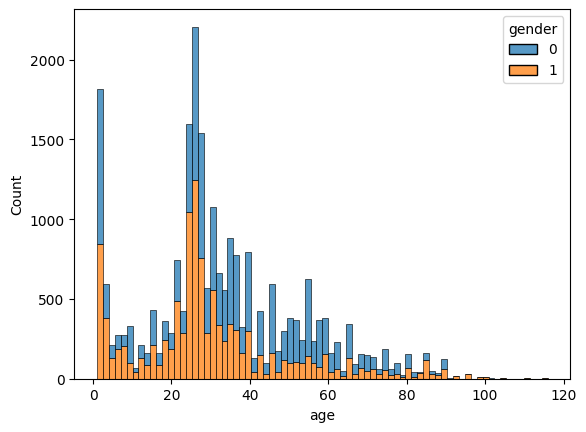

In [32]:
#Example of plotting multivariate distributions
sns.histplot(data=df, x='age', hue='gender', multiple='stack')
plt.show()

/var/folders/ql/ljj6ml2j5lddpwjnkf1hbs5m0000gn/T/ipykernel_59078/1892500903.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='race_label', data=df, palette='Set2')


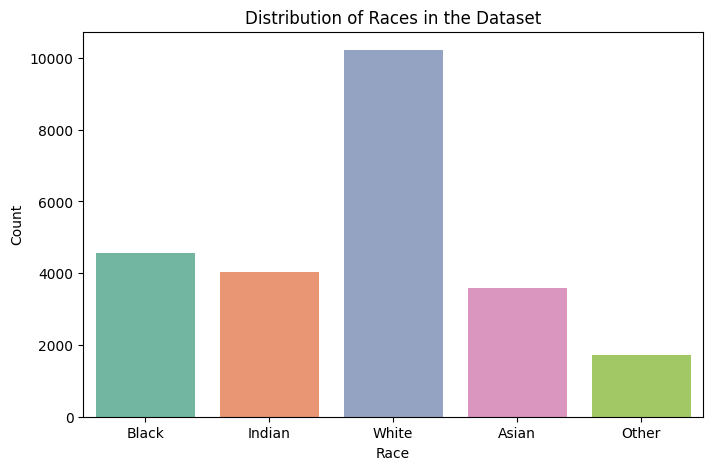

In [33]:
# Visualize the distribution of races in the dataset
import matplotlib.pyplot as plt
import seaborn as sns

# If 'race' is coded as int, you may want to map it to labels for clarity
race_labels = {
    0: 'White',
    1: 'Black',
    2: 'Asian',
    3: 'Indian',
    4: 'Other'
}

# If 'race' is a column in df, plot its distribution
if 'race' in df.columns:
    df['race_label'] = df['race'].map(race_labels)
    plt.figure(figsize=(8, 5))
    sns.countplot(x='race_label', data=df, palette='Set2')
    plt.title('Distribution of Races in the Dataset')
    plt.xlabel('Race')
    plt.ylabel('Count')
    plt.show()
else:
    print("Column 'race' not found in DataFrame.")


/var/folders/ql/ljj6ml2j5lddpwjnkf1hbs5m0000gn/T/ipykernel_59078/2362456056.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender_label', data=df, palette='Set1')


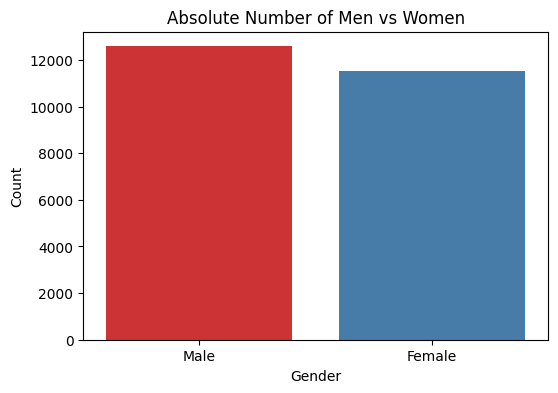

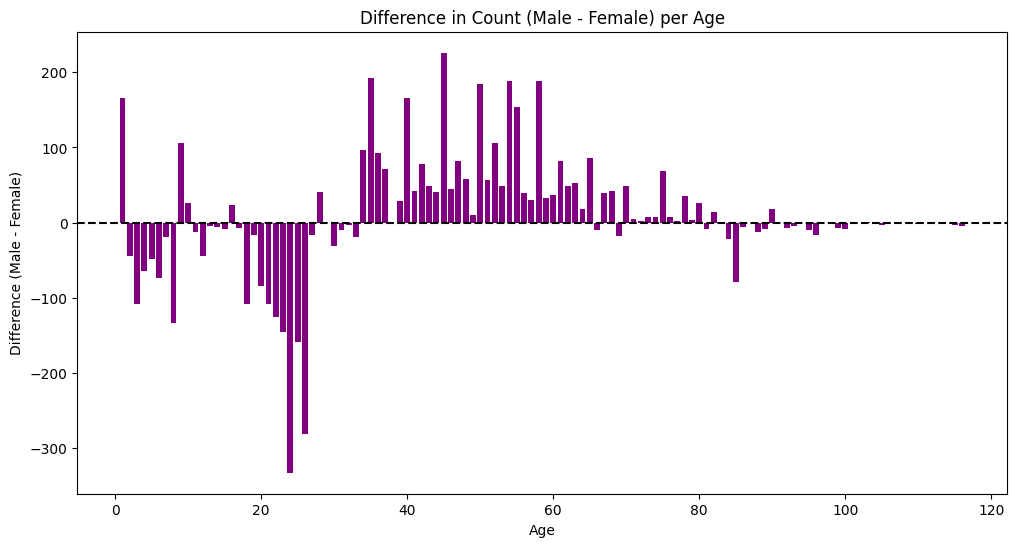

In [34]:
# Visualize the absolute number of men vs women
import matplotlib.pyplot as plt
import seaborn as sns

gender_labels = {0: 'Male', 1: 'Female'}
df['gender_label'] = df['gender'].map(gender_labels)

plt.figure(figsize=(6, 4))
sns.countplot(x='gender_label', data=df, palette='Set1')
plt.title('Absolute Number of Men vs Women')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualize the difference (male - female) per age
gender_age_counts = df.groupby(['age', 'gender_label']).size().unstack(fill_value=0)
gender_age_counts['diff'] = gender_age_counts.get('Male', 0) - gender_age_counts.get('Female', 0)

plt.figure(figsize=(12, 6))
plt.bar(gender_age_counts.index, gender_age_counts['diff'], color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title('Difference in Count (Male - Female) per Age')
plt.xlabel('Age')
plt.ylabel('Difference (Male - Female)')
plt.show()


## Age Distribution by Race
Visualize how age is distributed within each race group using boxplots.

/var/folders/ql/ljj6ml2j5lddpwjnkf1hbs5m0000gn/T/ipykernel_59078/985198868.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='race_label', y='age', data=df, palette='Set2')


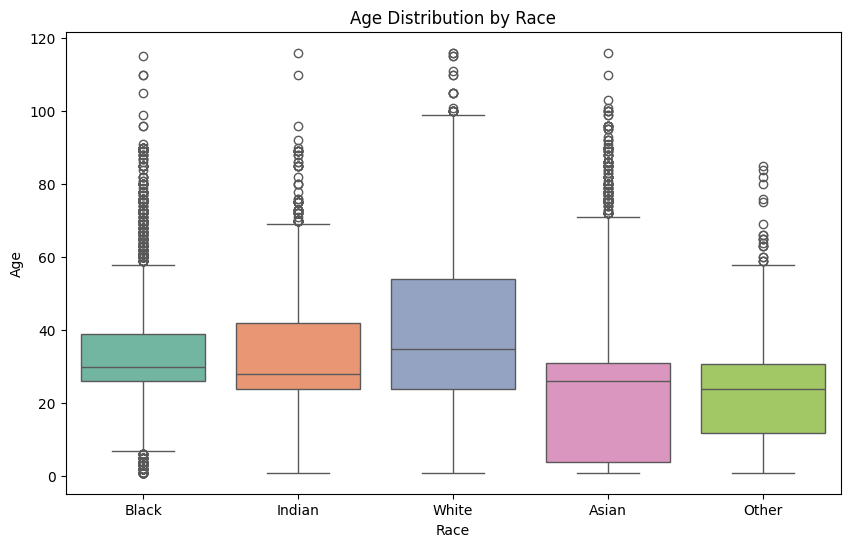

In [35]:
# Age distribution by race (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='race_label', y='age', data=df, palette='Set2')
plt.title('Age Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Age')
plt.show()

## Gender Distribution by Race
Visualize the number of males and females within each race group using a grouped bar plot.

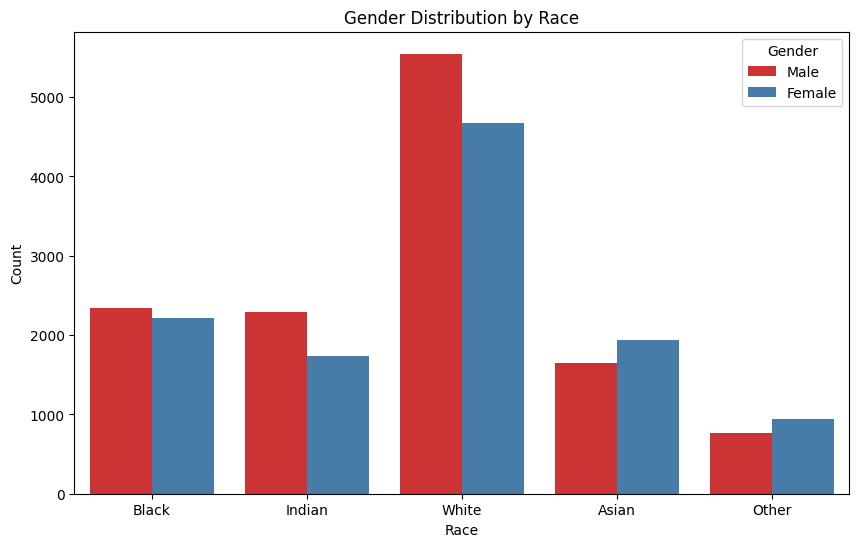

In [36]:
# Gender distribution by race (grouped bar plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='race_label', hue='gender_label', data=df, palette='Set1')
plt.title('Gender Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

## Sample Images per Age Group
Display a grid of random images for selected age groups to visually inspect differences.

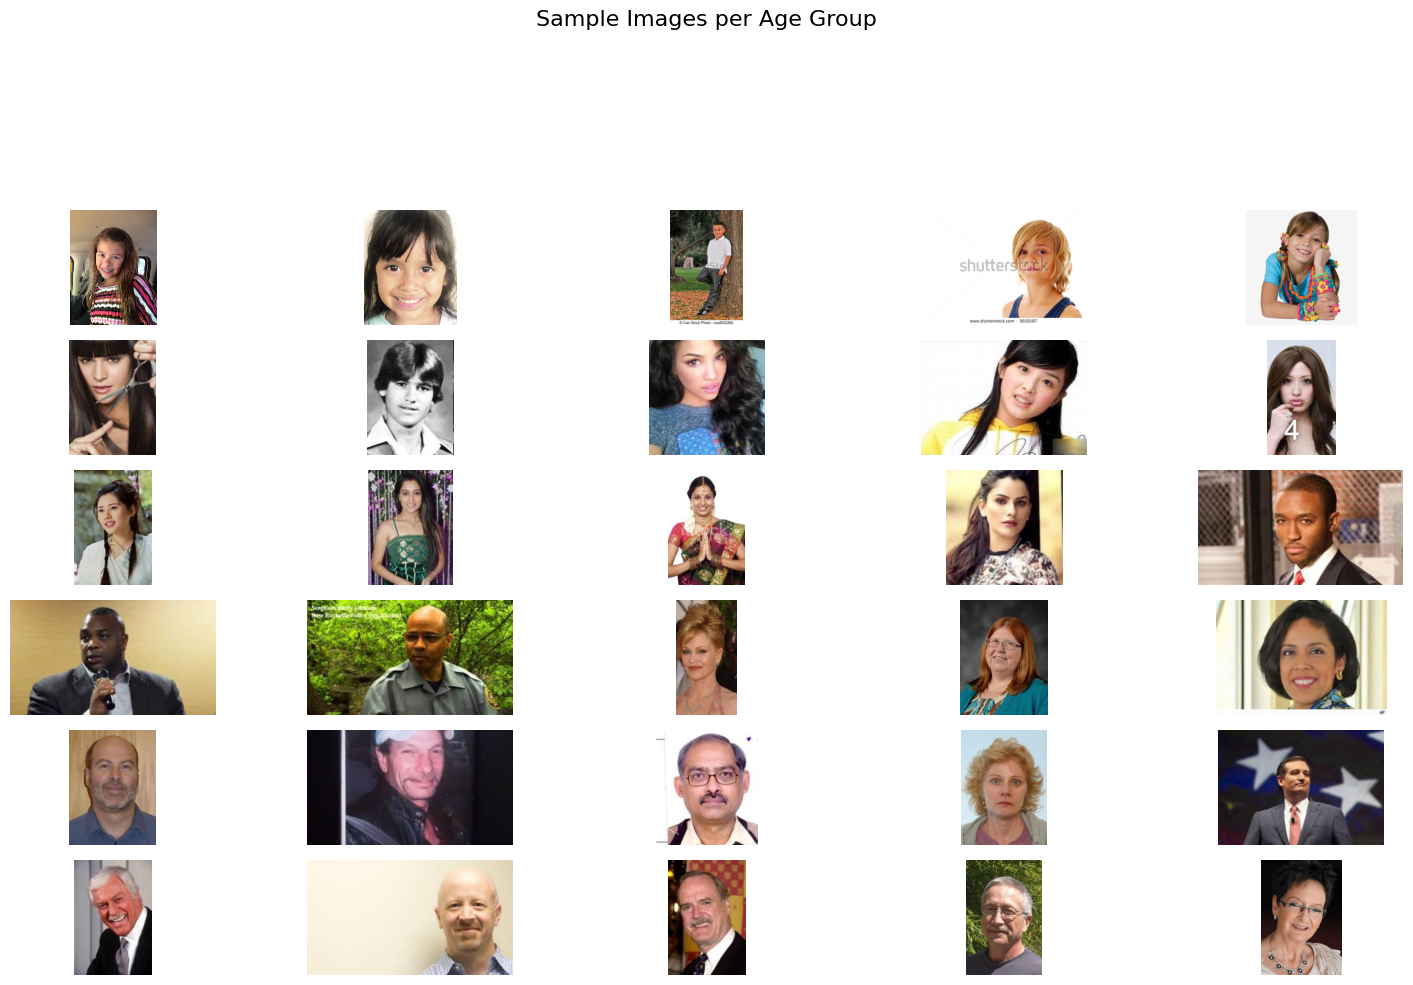

In [37]:
# Display sample images per selected age groups
age_groups = [0, 10, 20, 30, 40, 50, 60]  # Example age groups
n_samples = 5  # Number of images per group
plt.figure(figsize=(15, 10))
for i, age in enumerate(age_groups):
    group_df = df[df['age'] == age]
    if not group_df.empty:
        sample_files = group_df['filename'].sample(min(n_samples, len(group_df)), random_state=42)
        for j, fname in enumerate(sample_files):
            img = Image.open(os.path.join(DATASET_DIR, fname))
            plt.subplot(len(age_groups), n_samples, i * n_samples + j + 1)
            plt.imshow(img)
            plt.axis('off')
            if j == 0:
                plt.ylabel(f'Age {age}', fontsize=12)
plt.suptitle('Sample Images per Age Group', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Correlation Matrix
Visualize the correlation between numeric features (age, gender, race) in the dataset.

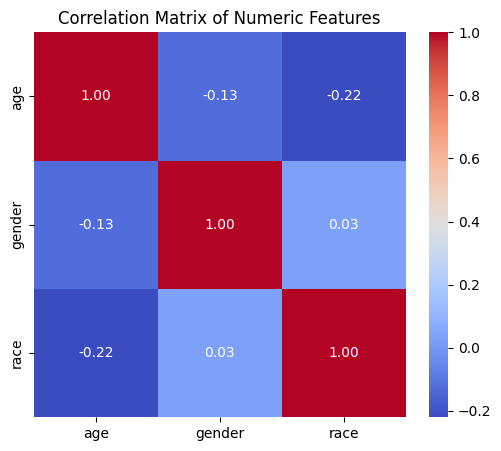

In [38]:
# Correlation matrix of numeric features
numeric_cols = ['age', 'gender', 'race']
corr = df[numeric_cols].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

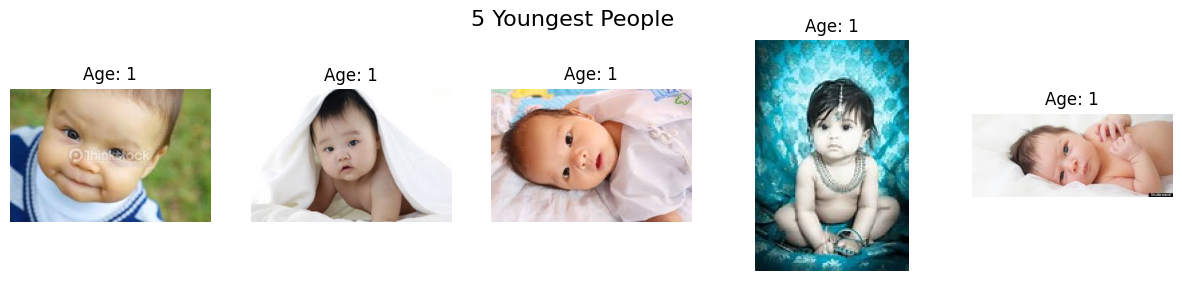

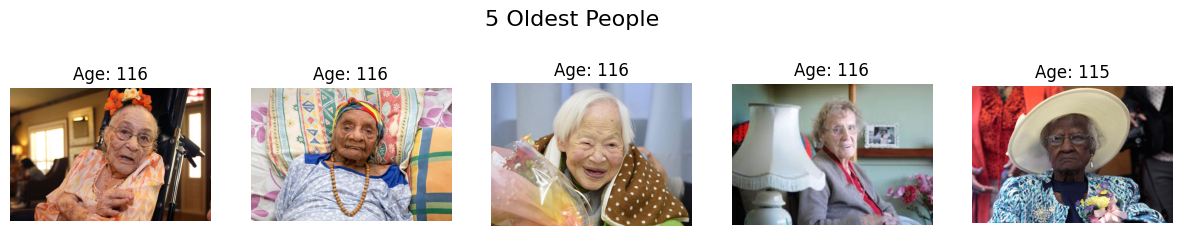

In [39]:
# Display 5 youngest and 5 oldest people's pictures and their ages
youngest = df.nsmallest(5, 'age')
oldest = df.nlargest(5, 'age')

def show_images_with_ages(subset, title):
    plt.figure(figsize=(15, 3))
    for i, row in enumerate(subset.itertuples()):
        img = Image.open(os.path.join(DATASET_DIR, row.filename))
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Age: {row.age}')
    plt.suptitle(title, fontsize=16)
    plt.show()

show_images_with_ages(youngest, '5 Youngest People')
show_images_with_ages(oldest, '5 Oldest People')